In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## the practice data  set use in this project is obtained from 
uber_df = pd.read_csv("https://raw.githubusercontent.com/goodluck08/practice_dataset/main/uberdrive.csv")

In [2]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
uber_df.to_csv("Uber_data.csv")

Q1. Show the last 10 records of the dataset.\
Q2. Show the first 10 records of the dataset.\
Q3. Show the dimension of the dataset.\
Q4. Show the size of the dataset.\
Q5. Print the information about all the variables of the data set.\
Q6. Check for missing values.\
Q7. How many missing values are present?\
Q8. Get the initial data (name it 'df') with dropping the NA values.\
Q9. Get the summary of the original data (before dropping the 'na' values).\
Q10. Check the information of the new dataframe.\
Q11. Get the unique start destinations.\
Q12. What is the total number of unique start destinations?\
Q13. Print the total number of unique stop destinations.\
Q14. Print all the Uber trips that has the starting point of San Francisco.\
Q15. What is the most popular starting point for the Uber drivers?\
Q16. What is the most popular dropping point for the Uber drivers?\
Q17. List the most frequent route taken by Uber drivers.\
Q18. Print all types of purposes for the trip in an array.\
Q19. Plot a bar graph of Purposes vs Distance.\
Q20. Print a dataframe of Purposes and the distance travelled for that particular Purpose.\
Q21. Plot number of trips vs Category of trips.\
Q22. What is proportion of trips that is Business and what is the proportion of trips that is Personal?

Explore data

Show the dimension of the dataset.

In [84]:
uber_df.shape

(1156, 7)

In [85]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Print the information about all the variables of the data set.

In [86]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Check for missing values in dataframe.

<AxesSubplot:>

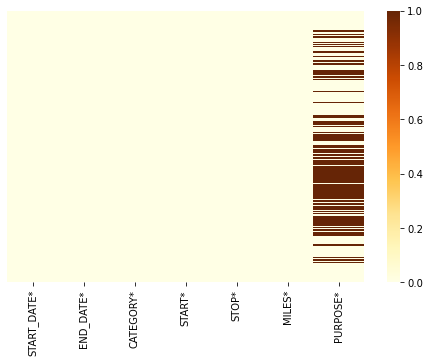

In [17]:
plt.figure(figsize=(8,5));
sns.heatmap(uber_df.isnull(), yticklabels=False, cmap='YlOrBr')

In [87]:
uber_df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Display the missing data.

In [88]:
# This function will run through each row in the data frame which contain missing value.
def nan_value(df):
    return df[df.isnull().any(axis=1)]

In [89]:
nan_value(uber_df)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,02-09-2016 10:54,02-09-2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,02-09-2016 11:43,02-09-2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,02-09-2016 13:36,02-09-2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
...,...,...,...,...,...,...,...
1066,12/19/2016 14:37,12/19/2016 14:50,Business,Unknown Location,Unknown Location,5.4,NaN
1069,12/19/2016 19:05,12/19/2016 19:17,Business,Islamabad,Unknown Location,2.2,NaN
1071,12/20/2016 8:49,12/20/2016 9:24,Business,Unknown Location,Rawalpindi,12.0,NaN
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Karachi,Unknown Location,6.4,NaN


Drop the last row since it is the summarize row. 

In [90]:
uber_df = uber_df.drop([1155])

Indicate the missing value by each col

In [91]:
uber_df.isnull().sum().sort_values(ascending=False)

PURPOSE*       502
START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
dtype: int64

Notice that the NA value from PURPOSE col

In [92]:
uber_df.iloc[:, 0:5].isnull().sum() # see if there are any missing value in other col

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
dtype: int64

Replace na in PURPOSE column with 'Not mention'

In [93]:
uber_df['PURPOSE*'] = uber_df['PURPOSE*'].fillna('Not mention')
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not mention
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


Return unique values contain in each column from dataframe

In [94]:
print(uber_df.apply(lambda col: col.unique()))

START_DATE*    [01-01-2016 21:11, 01-02-2016 01:25, 01-02-201...
END_DATE*      [01-01-2016 21:17, 01-02-2016 01:37, 01-02-201...
CATEGORY*                                   [Business, Personal]
START*         [Fort Pierce, West Palm Beach, Cary, Jamaica, ...
STOP*          [Fort Pierce, West Palm Beach, Palm Beach, Car...
MILES*         [5.1, 5.0, 4.8, 4.7, 63.7, 4.3, 7.1, 0.8, 8.3,...
PURPOSE*       [Meal/Entertain, Not mention, Errand/Supplies,...
dtype: object


In [95]:
uber_df['PURPOSE*'].value_counts()

Not mention        502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

In [96]:
uber_df['PURPOSE*'].value_counts()

Not mention        502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

Explore the Start - Stop Route

In [97]:
uber_route = uber_df.groupby('START*')['STOP*'].value_counts().rename('route_count')
uber_route

START*         STOP*             
Agnew          Renaissance            2
               Agnew                  1
               Cory                   1
Almond         Bryson City            1
Apex           Cary                  13
                                     ..
Whitebridge    Macgregor Downs        1
               Stonewater             1
               Summerwinds            1
               Williamsburg Manor     1
Winston Salem  Asheville              1
Name: route_count, Length: 361, dtype: int64

Display the most famous route 

In [98]:
uber_route.sort_values(ascending=False)

START*            STOP*           
Unknown Location  Unknown Location    86
Morrisville       Cary                75
Cary              Morrisville         67
                  Cary                53
                  Durham              36
                                      ..
Heritage Pines    Whitebridge          1
                  Edgehill Farms       1
Hell's Kitchen    Midtown              1
Hazelwood         Weston               1
Winston Salem     Asheville            1
Name: route_count, Length: 361, dtype: int64

In [99]:
uber_route[uber_route > 10]

START*            STOP*           
Apex              Cary                13
Cary              Morrisville         67
                  Cary                53
                  Durham              36
                  Raleigh             23
                  Apex                14
Durham            Cary                32
Islamabad         Unknown Location    28
                  Islamabad           25
Karachi           Karachi             22
Lahore            Lahore              27
Morrisville       Cary                75
Raleigh           Cary                21
Unknown Location  Unknown Location    86
                  Islamabad           28
Westpark Place    Whitebridge         16
Whitebridge       Westpark Place      14
Name: route_count, dtype: int64

In [100]:
uber_route[uber_route < 5]

START*         STOP*             
Agnew          Renaissance           2
               Agnew                 1
               Cory                  1
Almond         Bryson City           1
Apex           Apex                  2
                                    ..
Whitebridge    Macgregor Downs       1
               Stonewater            1
               Summerwinds           1
               Williamsburg Manor    1
Winston Salem  Asheville             1
Name: route_count, Length: 320, dtype: int64

Total Miles by each route

In [101]:
uber_df.groupby(['START*','STOP*']).sum().sort_values(by='MILES*',ascending=False).reset_index().rename(columns = {'MILES*':'total_miles'})

,START*,STOP*,total_miles
0,Unknown Location,Unknown Location,1360.8
1,Morrisville,Cary,395.7
2,Cary,Durham,390.0
3,Cary,Morrisville,380.0
4,Raleigh,Cary,365.7
...,...,...,...
356,Medical Centre,Tudor City,0.7
357,Sunnyside,Ingleside,0.7
358,Central,West Berkeley,0.6
359,Soho,Tribeca,0.5


In [102]:
uber_df.groupby(['START*','STOP*'])['PURPOSE*'].value_counts().sort_values(ascending=False)

START*            STOP*             PURPOSE*       
Unknown Location  Unknown Location  Not mention        56
Cary              Morrisville       Meal/Entertain     27
                  Durham            Meeting            27
Durham            Cary              Meeting            26
Morrisville       Cary              Not mention        24
                                                       ..
Islamabad         Islamabad         Meeting             1
Ingleside         Potrero Flats     Meeting             1
Huntington Woods  Weston            Not mention         1
                                    Errand/Supplies     1
Winston Salem     Asheville         Meeting             1
Name: PURPOSE*, Length: 527, dtype: int64

In [103]:
uber_df.groupby(['CATEGORY*'])['PURPOSE*'].value_counts()

CATEGORY*  PURPOSE*       
Business   Not mention        431
           Meeting            187
           Meal/Entertain     160
           Errand/Supplies    128
           Customer Visit     101
           Temporary Site      50
           Between Offices     18
           Airport/Travel       3
Personal   Not mention         71
           Moving               4
           Charity ($)          1
           Commute              1
Name: PURPOSE*, dtype: int64

In [104]:
uber_df.groupby(['CATEGORY*','PURPOSE*']).sum().reset_index().sort_values('MILES*', ascending=False)

,CATEGORY*,PURPOSE*,MILES*
6,Business,Not mention,4389.3
5,Business,Meeting,2851.3
2,Business,Customer Visit,2089.5
4,Business,Meal/Entertain,911.7
7,Business,Temporary Site,523.7
3,Business,Errand/Supplies,508.0
11,Personal,Not mention,504.2
1,Business,Between Offices,197.0
9,Personal,Commute,180.2
10,Personal,Moving,18.2


In [105]:
uber_df.groupby(['PURPOSE*','CATEGORY*'])['MILES*'].agg(['count','sum']).reset_index().sort_values(['CATEGORY*','count'],\
     ascending= False).rename(columns={'count': 'n_trip','sum' :'total_miles'})

,PURPOSE*,CATEGORY*,n_trip,total_miles
10,Not mention,Personal,71,504.2
8,Moving,Personal,4,18.2
2,Charity ($),Personal,1,15.1
3,Commute,Personal,1,180.2
9,Not mention,Business,431,4389.3
7,Meeting,Business,187,2851.3
6,Meal/Entertain,Business,160,911.7
5,Errand/Supplies,Business,128,508.0
4,Customer Visit,Business,101,2089.5
11,Temporary Site,Business,50,523.7


In [106]:
uber_df['PURPOSE*'].value_counts()

Not mention        502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

In [107]:
uber_df['START_DATE*'] = pd.to_datetime(uber_df['START_DATE*'])
uber_df['END_DATE*'] = pd.to_datetime(uber_df['END_DATE*'])

In [108]:
uber_df['START_DATE*'].dt.day_name().value_counts() 

Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: START_DATE*, dtype: int64

In [109]:
uber_df['END_DATE*'].dt.day_name().value_counts()

Friday       203
Monday       175
Tuesday      173
Thursday     154
Sunday       151
Saturday     150
Wednesday    149
Name: END_DATE*, dtype: int64

In [110]:
uber_df['date_diff'] = uber_df['END_DATE*'] - uber_df['START_DATE*']
uber_df['date_diff'].sort_values(ascending=False) 

776   0 days 05:36:00
269   0 days 05:30:00
546   0 days 03:26:00
559   0 days 03:05:00
881   0 days 03:01:00
            ...      
786   0 days 00:01:00
807   0 days 00:00:00
798   0 days 00:00:00
761   0 days 00:00:00
751   0 days 00:00:00
Name: date_diff, Length: 1155, dtype: timedelta64[ns]

In [111]:
uber_df['hour_of_day']= uber_df['START_DATE*'].dt.hour
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21


In [112]:
uber_df.dtypes

START_DATE*     datetime64[ns]
END_DATE*       datetime64[ns]
CATEGORY*               object
START*                  object
STOP*                   object
MILES*                 float64
PURPOSE*                object
date_diff      timedelta64[ns]
hour_of_day              int64
dtype: object

In [113]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21


In [114]:
uber_df.dtypes

START_DATE*     datetime64[ns]
END_DATE*       datetime64[ns]
CATEGORY*               object
START*                  object
STOP*                   object
MILES*                 float64
PURPOSE*                object
date_diff      timedelta64[ns]
hour_of_day              int64
dtype: object

In [115]:
uber_df['duration_hour'] = (uber_df['END_DATE*'] - uber_df['START_DATE*']) / np.timedelta64(1, 'h')
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.100000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1,0.200000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20,0.216667
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17,0.233333
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14,1.116667
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1,0.116667
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13,0.300000
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15,0.583333
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21,0.300000


In [116]:
#uber_df = uber_df.drop(columns = [''])

In [117]:
uber_df['duration_hour'] = round(uber_df['duration_hour'],3)
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.100
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1,0.200
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20,0.217
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17,0.233
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14,1.117
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1,0.117
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13,0.300
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15,0.583
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21,0.300


In [118]:
uber_df['duration_minutes'] = round(uber_df['duration_hour']*60)
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.100,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1,0.200,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20,0.217,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17,0.233,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14,1.117,67.0
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1,0.117,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13,0.300,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15,0.583,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21,0.300,18.0


In [119]:
uber_df['ST_day_name'] = uber_df['START_DATE*'].dt.day_name()
uber_df['ST_month'] = uber_df['START_DATE*'].dt.month_name()
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.100,6.0,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1,0.200,12.0,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20,0.217,13.0,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17,0.233,14.0,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14,1.117,67.0,Wednesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1,0.117,7.0,Saturday,December
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13,0.300,18.0,Saturday,December
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15,0.583,35.0,Saturday,December
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21,0.300,18.0,Saturday,December


In [120]:
uber_df.groupby('ST_month')['ST_day_name'].value_counts().head(15)

ST_month  ST_day_name
April     Friday         20
          Saturday       12
          Tuesday         8
          Thursday        7
          Sunday          4
          Wednesday       3
August    Monday         35
          Tuesday        27
          Friday         22
          Wednesday      17
          Sunday         13
          Thursday       11
          Saturday        8
December  Thursday       31
          Wednesday      25
Name: ST_day_name, dtype: int64

In [121]:
uber_df['ST_month'].value_counts().sort_values(ascending=False)

December     146
August       133
November     122
February     115
March        113
July         112
June         108
October      106
January       61
April         54
May           49
September     36
Name: ST_month, dtype: int64

In [122]:
uber_df['ST_day_name'].value_counts().sort_values(ascending=False)

Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: ST_day_name, dtype: int64

In [123]:
uber_df.groupby('ST_month')['ST_day_name'].value_counts().sort_values(ascending=False).head(10)

ST_month  ST_day_name
August    Monday         35
December  Thursday       31
August    Tuesday        27
February  Friday         25
December  Wednesday      25
July      Friday         24
December  Monday         23
March     Friday         23
June      Monday         22
December  Saturday       22
Name: ST_day_name, dtype: int64

In [124]:
uber_df.groupby(['ST_month','ST_day_name'])['MILES*'].agg(['count','sum']).sort_values(by = 'count',ascending=False).reset_index()\
    .rename(columns={'count': 'n_trip','sum' :'total_miles'})

,ST_month,ST_day_name,n_trip,total_miles
0,August,Monday,35,272.4
1,December,Thursday,31,219.2
2,August,Tuesday,27,193.8
3,February,Friday,25,194.1
4,December,Wednesday,25,246.3
...,...,...,...,...
78,January,Saturday,4,21.2
79,April,Wednesday,3,17.7
80,September,Saturday,3,13.4
81,September,Sunday,3,27.8


In [125]:
uber_df.groupby('hour_of_day')['MILES*'].agg(['count','sum']).reset_index().rename(columns={'count': 'total_trip','sum' :'total_miles', 'hour_of_day' : 'time(24hr)'})

,time(24hr),total_trip,total_miles
0,0,19,102.0
1,1,5,41.8
2,2,2,165.3
3,3,3,55.2
4,5,4,36.4
5,6,4,56.2
6,7,13,161.0
7,8,35,265.5
8,9,51,492.8
9,10,65,511.6


In [126]:
uber_df.groupby(['ST_month','hour_of_day'])['MILES*'].agg(['count','sum']).sort_values(by = 'count',ascending=False).reset_index()\
    .rename(columns={'count': 'n_trip','sum' :'total_miles'})

,ST_month,hour_of_day,n_trip,total_miles
0,November,15,17,65.0
1,August,16,16,268.9
2,December,13,15,58.5
3,August,15,15,162.8
4,October,18,14,262.6
...,...,...,...,...
211,October,1,1,17.1
212,October,7,1,29.8
213,January,20,1,4.8
214,January,19,1,6.2


In [127]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.100,6.0,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1,0.200,12.0,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20,0.217,13.0,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17,0.233,14.0,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14,1.117,67.0,Wednesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1,0.117,7.0,Saturday,December
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13,0.300,18.0,Saturday,December
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15,0.583,35.0,Saturday,December
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21,0.300,18.0,Saturday,December


In [128]:
uber_df['distance(km)'] = round(uber_df['MILES*']*1.6094,2)
uber_df['avg_speed(km/hr)'] = uber_df['distance(km)']/uber_df['duration_hour']
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month,distance(km),avg_speed(km/hr)
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.100,6.0,Friday,January,8.21,82.100000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1,0.200,12.0,Saturday,January,8.05,40.250000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20,0.217,13.0,Saturday,January,7.73,35.622120
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17,0.233,14.0,Tuesday,January,7.56,32.446352
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14,1.117,67.0,Wednesday,January,102.52,91.781558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1,0.117,7.0,Saturday,December,1.13,9.658120
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13,0.300,18.0,Saturday,December,6.28,20.933333
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15,0.583,35.0,Saturday,December,26.07,44.716981
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21,0.300,18.0,Saturday,December,10.30,34.333333


In [129]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month,distance(km),avg_speed(km/hr)
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.100,6.0,Friday,January,8.21,82.100000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1,0.200,12.0,Saturday,January,8.05,40.250000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20,0.217,13.0,Saturday,January,7.73,35.622120
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17,0.233,14.0,Tuesday,January,7.56,32.446352
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14,1.117,67.0,Wednesday,January,102.52,91.781558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1,0.117,7.0,Saturday,December,1.13,9.658120
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13,0.300,18.0,Saturday,December,6.28,20.933333
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15,0.583,35.0,Saturday,December,26.07,44.716981
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21,0.300,18.0,Saturday,December,10.30,34.333333


c:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


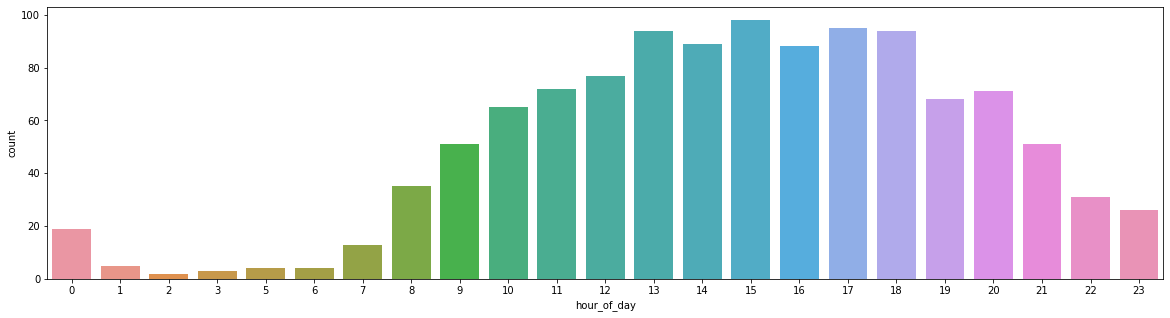

In [130]:
plt.figure(figsize=(20,5));
sns.countplot(uber_df['hour_of_day']);

<AxesSubplot:xlabel='avg_speed(km/hr)', ylabel='Density'>

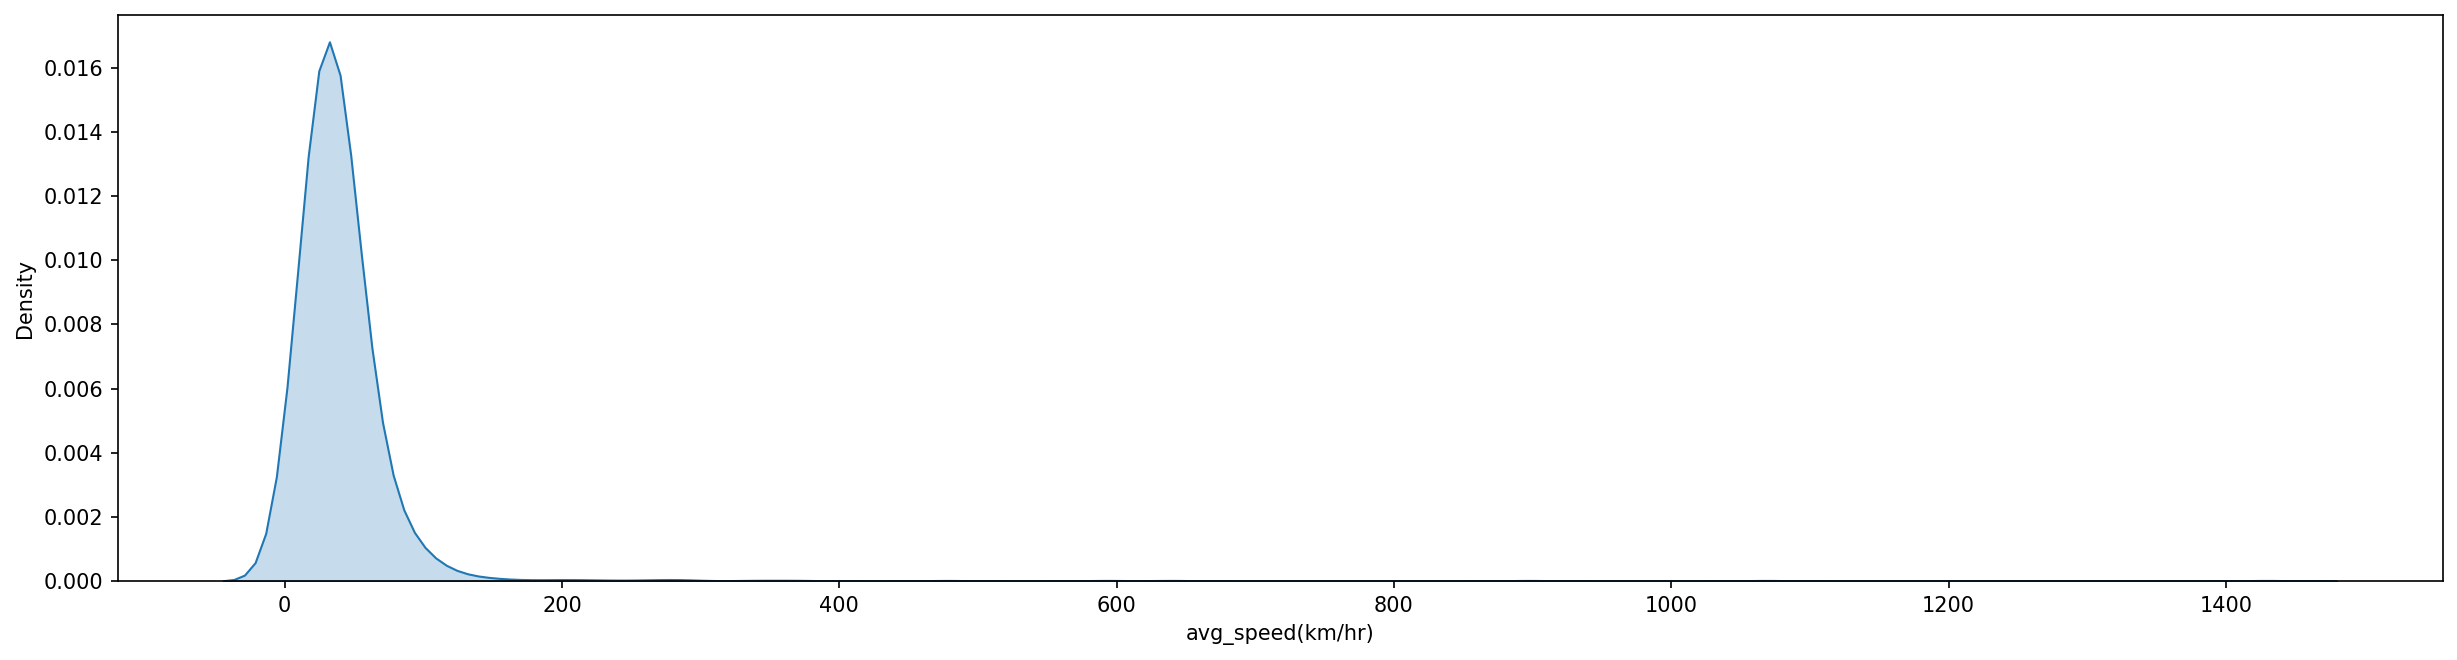

In [131]:
plt.figure(figsize=(20,5),dpi =150)
sns.kdeplot(data = uber_df['avg_speed(km/hr)'], shade = True, palette='Set1')

In [132]:
uber_df['avg_speed(km/hr)'].sort_values(ascending=False).head(10)

761            inf
751            inf
807            inf
798            inf
786    1429.411765
791    1068.600000
789     897.272727
788     640.353357
804     592.200000
754     477.878788
Name: avg_speed(km/hr), dtype: float64

In [133]:
#glue = sns.("uber_df").pivot("ST_day_name", "ST_month", "duration_minutes")
#sns.heatmap(uber_df)

In [134]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month,distance(km),avg_speed(km/hr)
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.100,6.0,Friday,January,8.21,82.100000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1,0.200,12.0,Saturday,January,8.05,40.250000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20,0.217,13.0,Saturday,January,7.73,35.622120
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17,0.233,14.0,Tuesday,January,7.56,32.446352
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14,1.117,67.0,Wednesday,January,102.52,91.781558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1,0.117,7.0,Saturday,December,1.13,9.658120
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13,0.300,18.0,Saturday,December,6.28,20.933333
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15,0.583,35.0,Saturday,December,26.07,44.716981
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21,0.300,18.0,Saturday,December,10.30,34.333333


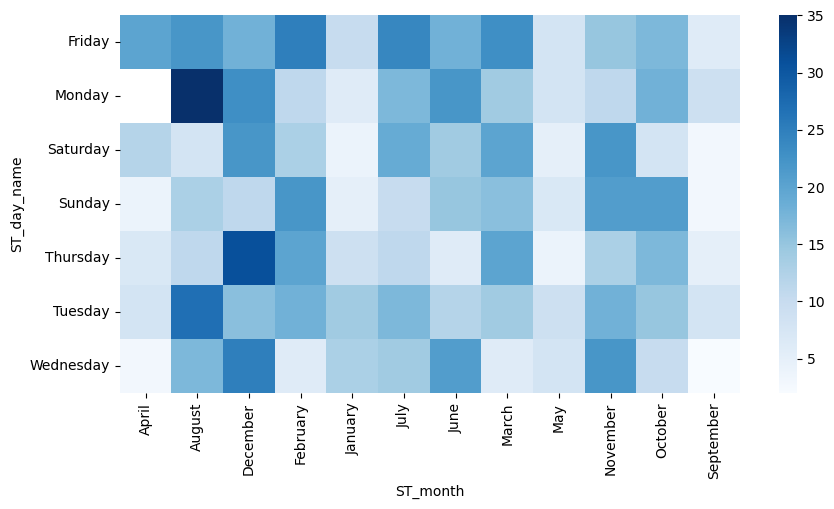

In [135]:
plt.figure(figsize=(10,5),dpi =100)
x = (uber_df.groupby('ST_day_name').ST_month.value_counts().unstack())
sns.heatmap(x,cmap = 'Blues');

<AxesSubplot:xlabel='hour_of_day', ylabel='ST_day_name'>

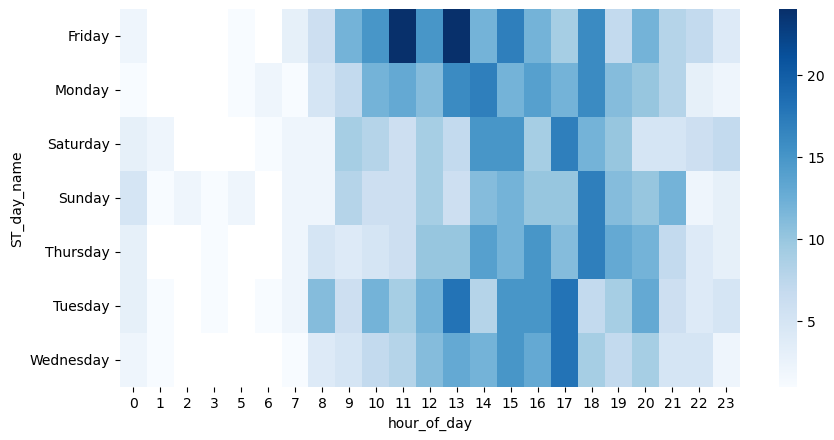

In [136]:
plt.figure(figsize=(10,5),dpi =100)
x2 = (uber_df.groupby('ST_day_name').hour_of_day.value_counts().unstack())
sns.heatmap(x2,cmap = 'Blues')

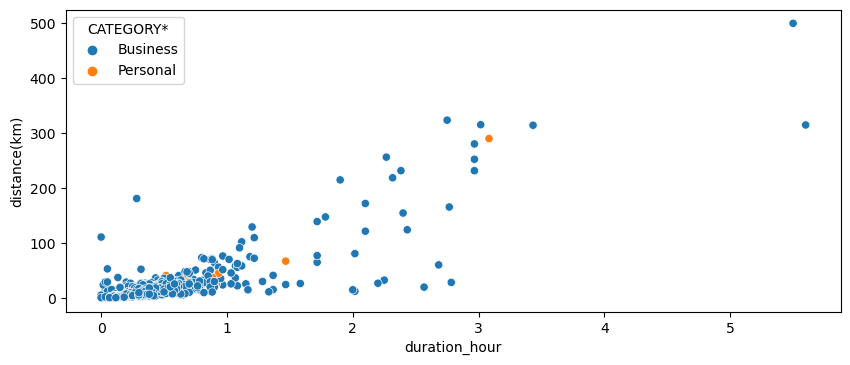

In [137]:
#CODE HERE

plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data = uber_df, x='duration_hour', y='distance(km)', hue = 'CATEGORY*' );

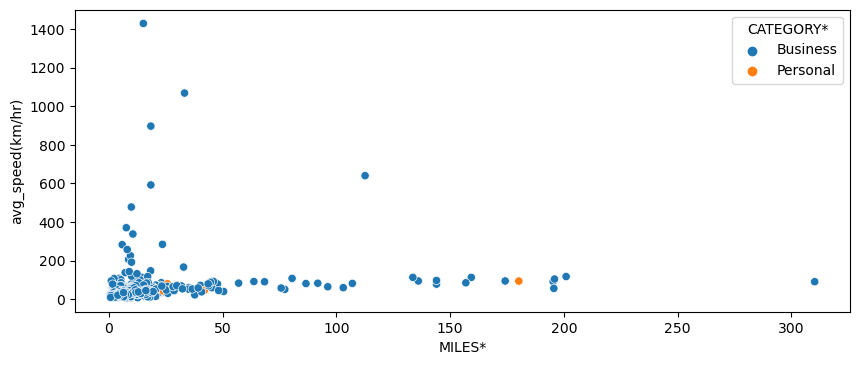

In [138]:

plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data = uber_df, x='MILES*', y='avg_speed(km/hr)', hue = 'CATEGORY*' );

In [139]:
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month,distance(km),avg_speed(km/hr)
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.100,6.0,Friday,January,8.21,82.100000
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1,0.200,12.0,Saturday,January,8.05,40.250000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20,0.217,13.0,Saturday,January,7.73,35.622120
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17,0.233,14.0,Tuesday,January,7.56,32.446352
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14,1.117,67.0,Wednesday,January,102.52,91.781558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1,0.117,7.0,Saturday,December,1.13,9.658120
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13,0.300,18.0,Saturday,December,6.28,20.933333
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15,0.583,35.0,Saturday,December,26.07,44.716981
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21,0.300,18.0,Saturday,December,10.30,34.333333


Filter out the outlier from the data table, notice that it is unlikely that the avg_speed will exceed 120 km/hr and in some rows the START_DATE* and END_DATE* is same making the avg_speed infinity

In [140]:
uber_df[(uber_df['avg_speed(km/hr)']>120)]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month,distance(km),avg_speed(km/hr)
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,0 days 00:05:00,17,0.083,5.0,Wednesday,January,11.43,137.710843
121,2016-02-18 08:19:00,2016-02-18 08:27:00,Business,Unknown Location,Unknown Location,23.5,Temporary Site,0 days 00:08:00,8,0.133,8.0,Thursday,February,37.82,284.360902
126,2016-02-19 09:02:00,2016-02-19 09:14:00,Business,Unknown Location,Unknown Location,18.3,Meeting,0 days 00:12:00,9,0.200,12.0,Friday,February,29.45,147.250000
335,2016-04-28 13:30:00,2016-04-28 13:49:00,Business,Raleigh,Cary,32.8,Customer Visit,0 days 00:19:00,13,0.317,19.0,Thursday,April,52.79,166.529968
375,2016-05-18 13:00:00,2016-05-18 13:02:00,Business,Morrisville,Raleigh,7.6,Customer Visit,0 days 00:02:00,13,0.033,2.0,Wednesday,May,12.23,370.606061
525,2016-07-07 10:27:00,2016-07-07 10:33:00,Business,Morrisville,Cary,8.9,Not mention,0 days 00:06:00,10,0.100,6.0,Thursday,July,14.32,143.200000
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,Not mention,0 days 00:00:00,17,0.000,0.0,Tuesday,September,111.21,inf
753,2016-09-11 09:51:00,2016-09-11 09:55:00,Business,Unknown Location,Unknown Location,8.6,Not mention,0 days 00:04:00,9,0.067,4.0,Sunday,September,13.84,206.567164
754,2016-09-11 21:40:00,2016-09-11 21:42:00,Business,Unknown Location,Unknown Location,9.8,Not mention,0 days 00:02:00,21,0.033,2.0,Sunday,September,15.77,477.878788
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,Not mention,0 days 00:00:00,7,0.000,0.0,Friday,September,2.58,inf


In [141]:
outlier_data =  uber_df[(uber_df['avg_speed(km/hr)']>120) & (uber_df['duration_minutes']<20)]

outlier_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month,distance(km),avg_speed(km/hr)
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,0 days 00:05:00,17,0.083,5.0,Wednesday,January,11.43,137.710843
121,2016-02-18 08:19:00,2016-02-18 08:27:00,Business,Unknown Location,Unknown Location,23.5,Temporary Site,0 days 00:08:00,8,0.133,8.0,Thursday,February,37.82,284.360902
126,2016-02-19 09:02:00,2016-02-19 09:14:00,Business,Unknown Location,Unknown Location,18.3,Meeting,0 days 00:12:00,9,0.200,12.0,Friday,February,29.45,147.250000
335,2016-04-28 13:30:00,2016-04-28 13:49:00,Business,Raleigh,Cary,32.8,Customer Visit,0 days 00:19:00,13,0.317,19.0,Thursday,April,52.79,166.529968
375,2016-05-18 13:00:00,2016-05-18 13:02:00,Business,Morrisville,Raleigh,7.6,Customer Visit,0 days 00:02:00,13,0.033,2.0,Wednesday,May,12.23,370.606061
525,2016-07-07 10:27:00,2016-07-07 10:33:00,Business,Morrisville,Cary,8.9,Not mention,0 days 00:06:00,10,0.100,6.0,Thursday,July,14.32,143.200000
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,Not mention,0 days 00:00:00,17,0.000,0.0,Tuesday,September,111.21,inf
753,2016-09-11 09:51:00,2016-09-11 09:55:00,Business,Unknown Location,Unknown Location,8.6,Not mention,0 days 00:04:00,9,0.067,4.0,Sunday,September,13.84,206.567164
754,2016-09-11 21:40:00,2016-09-11 21:42:00,Business,Unknown Location,Unknown Location,9.8,Not mention,0 days 00:02:00,21,0.033,2.0,Sunday,September,15.77,477.878788
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,Not mention,0 days 00:00:00,7,0.000,0.0,Friday,September,2.58,inf


In [142]:
t = outlier_data.index
t


Int64Index([   6,  121,  126,  335,  375,  525,  751,  753,  754,  761,  762,
             773,  781,  786,  788,  789,  791,  798,  799,  804,  807,  933,
            1094],
           dtype='int64')

In [158]:
uber_df.drop(outlier_data.index).reset_index()

,index,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month,distance(km),avg_speed(km/hr),month_num
0,0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.100,6.0,Friday,January,8.21,82.100000,1
1,1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1,0.200,12.0,Saturday,January,8.05,40.250000,1
2,2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20,0.217,13.0,Saturday,January,7.73,35.622120,1
3,3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17,0.233,14.0,Tuesday,January,7.56,32.446352,1
4,4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14,1.117,67.0,Wednesday,January,102.52,91.781558,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1,0.117,7.0,Saturday,December,1.13,9.658120,12
1128,1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13,0.300,18.0,Saturday,December,6.28,20.933333,12
1129,1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15,0.583,35.0,Saturday,December,26.07,44.716981,12
1130,1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21,0.300,18.0,Saturday,December,10.30,34.333333,12


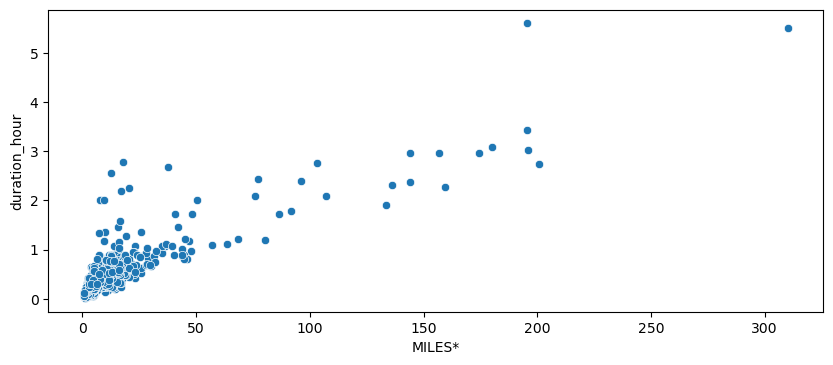

In [159]:
t = uber_df.drop(outlier_data.index).reset_index()
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(data = t, x='MILES*', y='duration_hour');
            

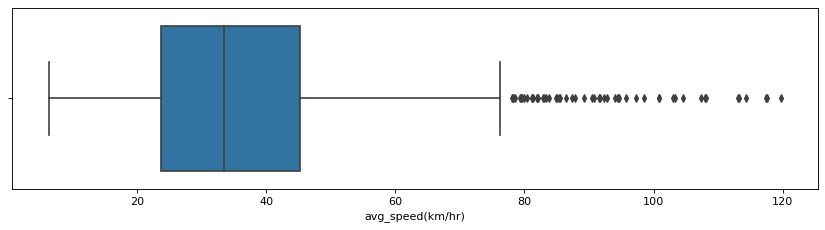

In [160]:
plt.figure(figsize=(13,3),dpi=80)
sns.boxplot( x=t["avg_speed(km/hr)"]);

In [145]:
uber_df.head(1)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month,distance(km),avg_speed(km/hr)
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.1,6.0,Friday,January,8.21,82.1


roughly plot the histrogram to see th e rush hour in each day

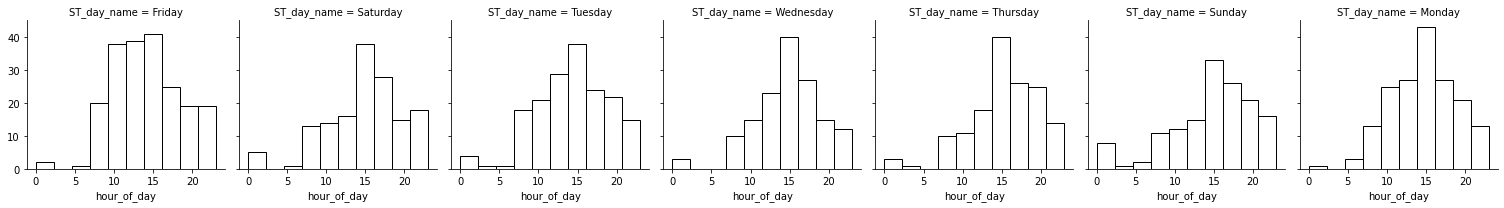

In [146]:
grid = sns.FacetGrid(t, col="ST_day_name", margin_titles=True)
grid.map(plt.hist, "hour_of_day", bins=10,fill=False);

Plot the total trips by each month

c:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


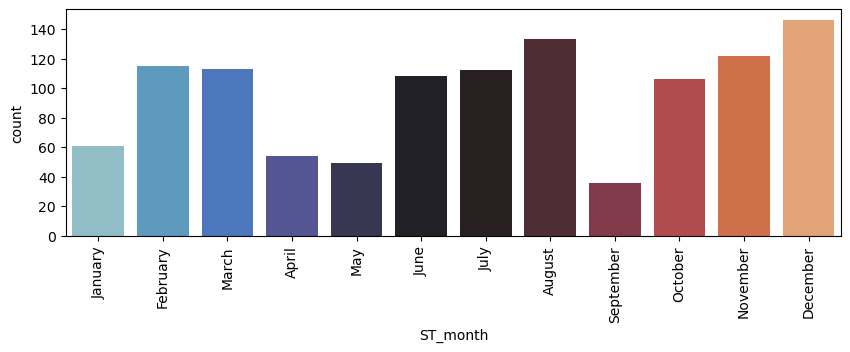

In [147]:
plt.figure(figsize=(10,3),dpi=100);
sns.countplot(uber_df['ST_month'],palette = "icefire");
plt.xticks(rotation=90);


<AxesSubplot:xlabel='avg_speed(km/hr)', ylabel='Density'>

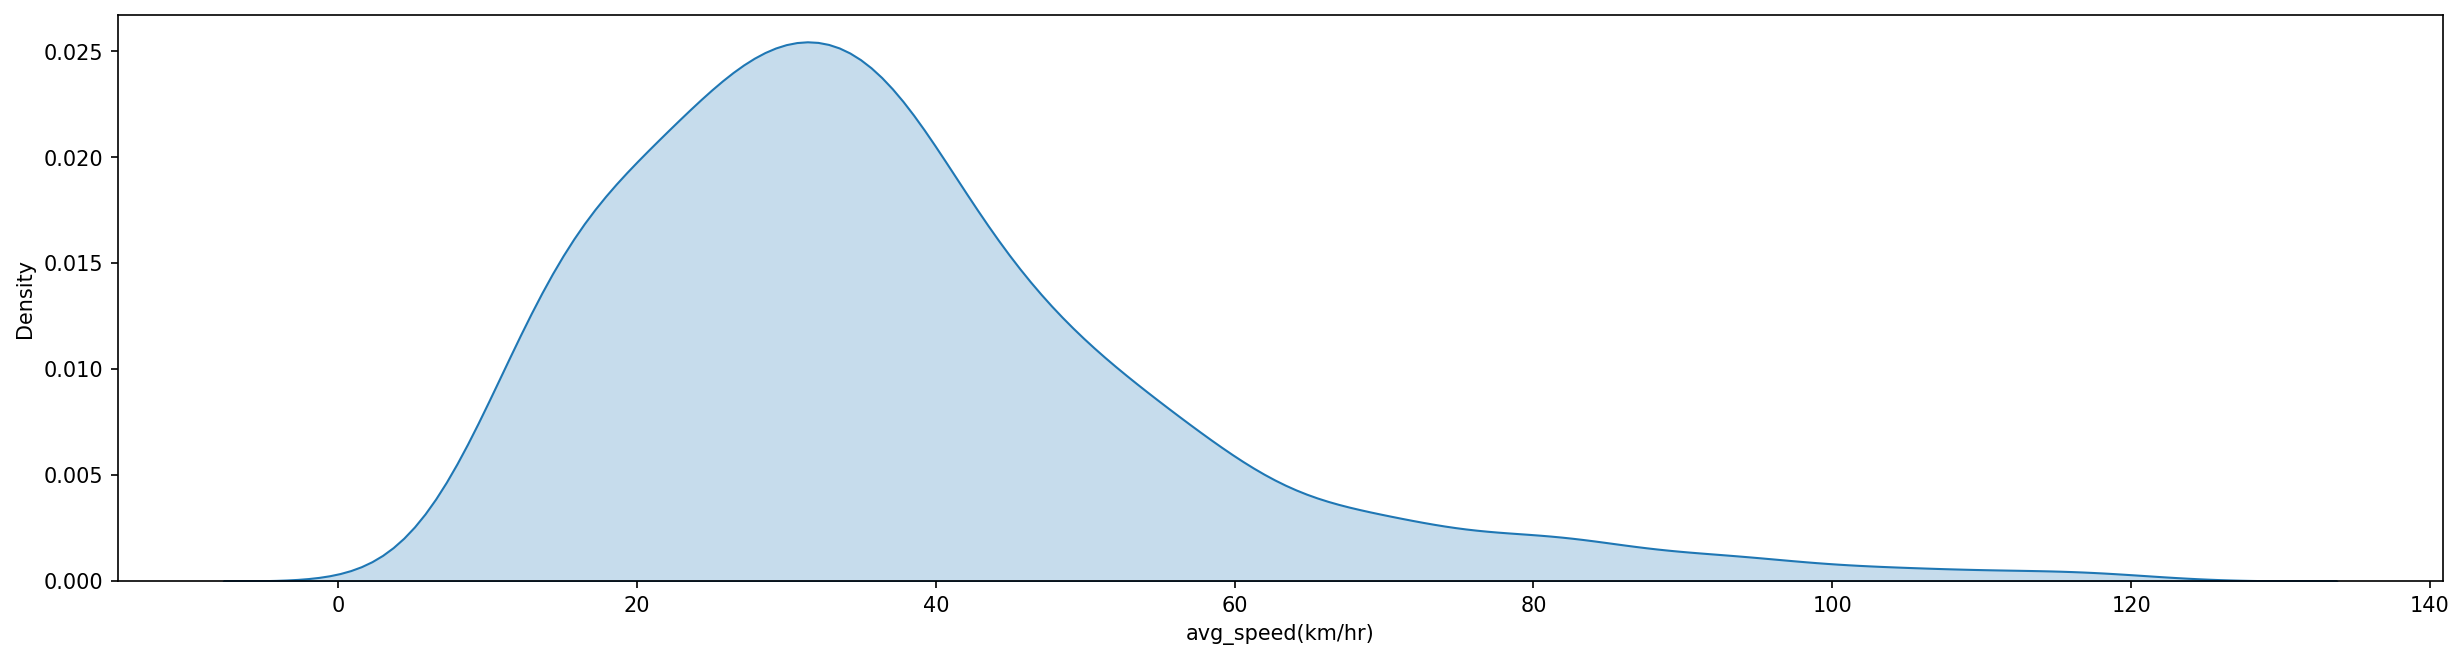

In [161]:
plt.figure(figsize=(20,5),dpi =150)
sns.kdeplot(data = t['avg_speed(km/hr)'], shade = True, palette='Set1')

In [149]:
t.head(1)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month,distance(km),avg_speed(km/hr)
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.1,6.0,Friday,January,8.21,82.1


In [150]:
uber_df['month_num'] = uber_df['START_DATE*'].dt.month
uber_df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date_diff,hour_of_day,duration_hour,duration_minutes,ST_day_name,ST_month,distance(km),avg_speed(km/hr),month_num
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21,0.100,6.0,Friday,January,8.21,82.100000,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not mention,0 days 00:12:00,1,0.200,12.0,Saturday,January,8.05,40.250000,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20,0.217,13.0,Saturday,January,7.73,35.622120,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17,0.233,14.0,Tuesday,January,7.56,32.446352,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14,1.117,67.0,Wednesday,January,102.52,91.781558,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,1,0.117,7.0,Saturday,December,1.13,9.658120,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13,0.300,18.0,Saturday,December,6.28,20.933333,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15,0.583,35.0,Saturday,December,26.07,44.716981,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21,0.300,18.0,Saturday,December,10.30,34.333333,12


In [151]:
m_dt = uber_df[['month_num','MILES*','ST_month']].groupby(['month_num','ST_month']).count().reset_index().rename(columns ={'MILES*':'count', 'ST_month':'month','month_num':'month_no'})
m_dt

,month_no,month,count
0,1,January,61
1,2,February,115
2,3,March,113
3,4,April,54
4,5,May,49
5,6,June,108
6,7,July,112
7,8,August,133
8,9,September,36
9,10,October,106


(0.0, 170.0)

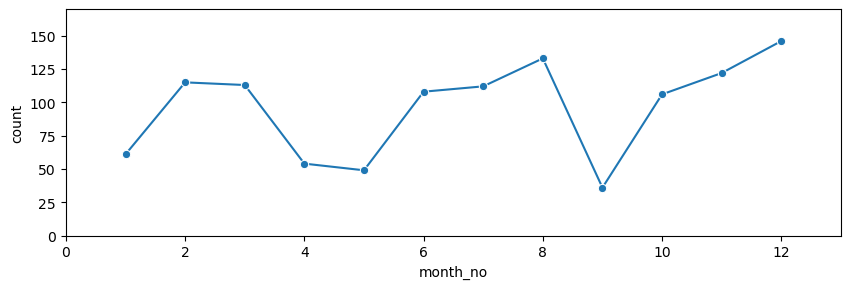

In [152]:
plt.figure(figsize=(10,3),dpi = 100)
sns.lineplot(data=m_dt, y='count',x='month_no',marker="o")
plt.xlim(0,13)
plt.ylim(0,170)

c:\Users\ASUS\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


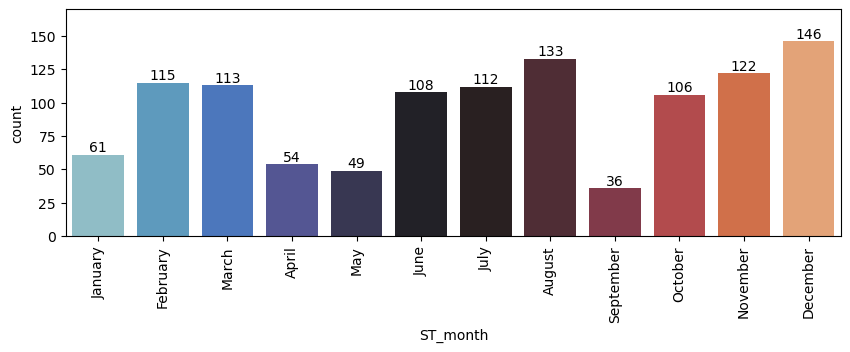

In [153]:

plt.figure(figsize=(10,3),dpi=100);
ax = sns.countplot(uber_df['ST_month'],palette = "icefire",);
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);
plt.ylim(0,170);


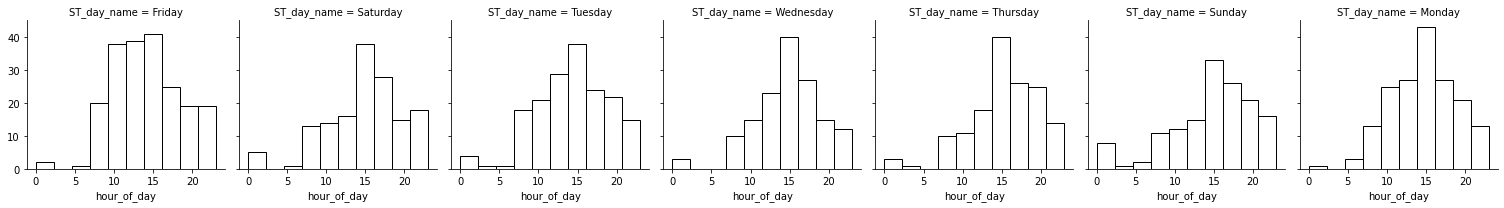

In [154]:
grid = sns.FacetGrid(t, col="ST_day_name", margin_titles=True)
grid.map(plt.hist, "hour_of_day", bins=10,fill=False);

In [155]:
lp = uber_df[['hour_of_day','ST_day_name','MILES*']].groupby(['ST_day_name','hour_of_day']).count().reset_index()
lp
#plt.figure(figsize=(10,3),dpi=100);
#sns.lineplot(data = lp, x='hour_of_day',y='MILES*',err_style='bars', hue='ST_day_name');

,ST_day_name,hour_of_day,MILES*
0,Friday,0,2
1,Friday,5,1
2,Friday,7,3
3,Friday,8,6
4,Friday,9,12
...,...,...,...
135,Wednesday,19,7
136,Wednesday,20,9
137,Wednesday,21,5
138,Wednesday,22,5
